# 🔥 1️⃣ What is Classification?

**Classification** is a type of **Supervised Machine Learning** where the goal is to predict a **categorical output** (class label).

### 📌 What does it predict?
- Labels like:  
  - **Spam / Not Spam**
  - **Positive / Negative Review**
  - **Cat / Dog**
  - **Disease Present / Absent**
  
### 📌 Input & Output
- **Input (X):** Features  
  Example: age, income, pixels of an image  
- **Output (y):** Category / Class  
  Example: 0 or 1, or among many classes

---

# 🧠 Types of Classification

### 1️⃣ **Binary Classification**
- Only **two categories**
- Example:
  - Email spam → **Spam (1)** or **Not Spam (0)**  
  - Tumor → **Benign (0)** or **Malignant (1)**  

### 2️⃣ **Multiclass Classification**
- More than two classes  
- Example:
  - Handwritten digit recognition → **0–9**
  - Weather → Sunny / Rainy / Cloudy  

### 3️⃣ **Multi-label Classification**
- One instance can have **multiple labels**
- Example:
  - A movie → Action ✔, Drama ✔, Romance ✖  
  - An image → Person ✔, Dog ✔, Tree ✔  

---

# 🧩 Why Classification?

Classification helps answer:
- **Is this correct or incorrect?**
- **Which category does this belong to?**
- **What type/class is this?**

It is essential in:
- Medical diagnosis  
- Email filtering  
- Fraud detection  
- Image & speech recognition  
- Customer segmentation  

---

# 🔍 How Classification Works?

1. Model learns patterns from **labeled data**
2. Learns decision boundaries
3. Predicts new data into correct class  
4. Evaluates performance using metrics:
   - Accuracy
   - Precision
   - Recall
   - F1 Score
   - Confusion Matrix

---

Next, let’s see examples in Python.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_digits, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression


# 🔥 2️⃣ Binary Classification Example
We will create a dataset with two classes (0 and 1) using `make_classification`.

Model used: **Logistic Regression**


d:\Python\ml-basics\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


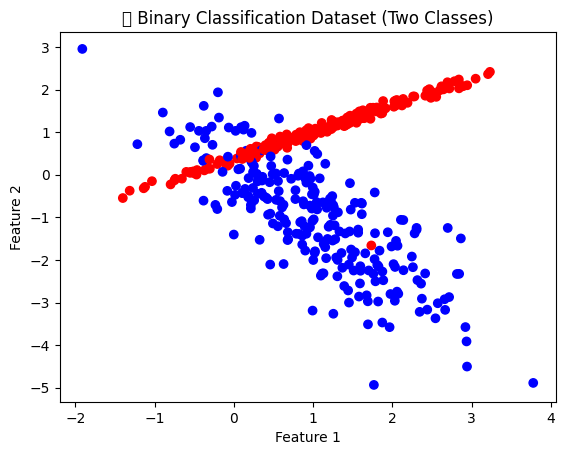

In [2]:
# Generate dataset for binary classification
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Visualization
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.title("🔵 Binary Classification Dataset (Two Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88

Confusion Matrix:
 [[45  6]
 [ 6 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.88      0.88      0.88        49

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



# 🔥 3️⃣ Multiclass Classification Example

Dataset: **Digits Dataset (0–9)**  
Goal: Predict which digit (0 to 9) is written.


In [5]:
digits = load_digits()

X = digits.data
y = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



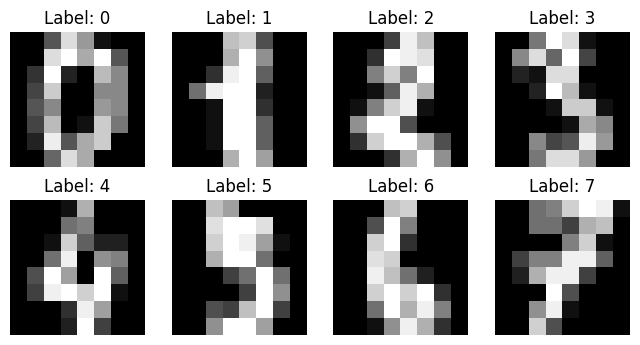

In [6]:
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.show()


# 🔥 4️⃣ Multi-Label Classification Example

One sample can have **multiple labels**.

We simulate:
- Label 1 → Value > median of feature 1
- Label 2 → Value > median of feature 2


In [7]:
# Simulate dataset
X, _ = make_classification(
    n_samples=300, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)

# Multi-label targets
y1 = (X[:,0] > np.median(X[:,0])).astype(int)
y2 = (X[:,1] > np.median(X[:,1])).astype(int)

Y = np.vstack([y1, y2]).T  # Shape: (samples, 2)

print("Sample multi-label output:\n", Y[:10])


Sample multi-label output:
 [[0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]]


In [8]:
from sklearn.multioutput import MultiOutputClassifier

model = MultiOutputClassifier(LogisticRegression())
model.fit(X, Y)
pred = model.predict(X[:5])

print("Predictions:\n", pred)
print("Actual:\n", Y[:5])


Predictions:
 [[0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]
Actual:
 [[0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


# 🎯 Final Summary — Classification

### 🔍 What is Classification?
- Predicts **categorical labels**
- Uses **supervised learning**

---

### 🧠 Types of Classification

| Type | Meaning | Example |
|------|---------|---------|
| **Binary** | 2 classes | Spam / Not Spam |
| **Multiclass** | 3+ classes | Digit (0–9) |
| **Multi-label** | Multiple labels per sample | Movie genres |

---

### 🚀 How Classification Works?
1. Learn from labeled data  
2. Build decision boundaries  
3. Predict class for new samples  
4. Evaluate using:
   - Accuracy
   - Precision
   - Recall
   - F1 Score
   - Confusion Matrix

---

### 📝 Algorithms Used:
- Logistic Regression
- KNN
- Decision Trees
- Random Forest
- Gradient Boosting
- SVM  
(and more in later chapters!)

---

👍 You now understand **all classification types with examples and code**.


# 🔥 Logistic Regression — Complete Guide

## What is Logistic Regression?
- Logistic Regression is a **classification algorithm**, not a regression algorithm.
- It predicts the **probability of an instance belonging to a class** (0 or 1 in binary classification).
- Uses the **sigmoid function** to map any real-valued number to a probability between 0 and 1.

### Sigmoid Function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- Output: 0 → class 0, 1 → class 1  
- Decision threshold: usually 0.5

---

## Why Logistic Regression?
- Simple and interpretable
- Works well for **binary classification**
- Can output probabilities
- Can be extended to **multiclass classification** (one-vs-rest / softmax)

---

## How it Works
1. Compute linear combination:  

$$
z = w \cdot X + b
$$

2. Apply sigmoid function:  

$$
\hat{y} = \sigma(z)
$$

3. Compute **loss function**: Binary Cross-Entropy / Log Loss  

$$
L = - \frac{1}{n} \sum_{i=1}^{n} \big[ y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) \big]
$$

4. Optimize weights using **Gradient Descent**

---


# 📝 Create a Binary Classification Dataset

We will create a synthetic dataset using sklearn's `make_classification`.
- 2 informative features
- Binary target (0 or 1)


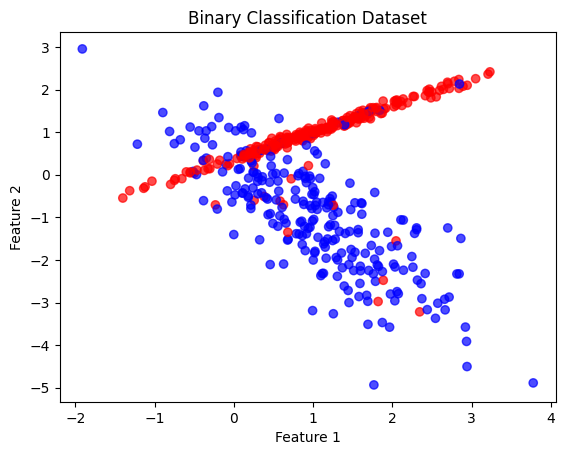

In [2]:
X, y = make_classification(
    n_samples=500, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1,
    flip_y=0.1,
    random_state=42
)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Visualize dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")
plt.show()


# 🔥 Logistic Regression Class from Scratch

Steps:
1. Initialize weights and bias
2. Use **sigmoid function** to get probabilities
3. Compute **binary cross-entropy loss**
4. Update weights with **gradient descent**
5. Predict classes based on threshold 0.5


In [3]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        
        # initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for i in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            # compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # compute loss (binary cross-entropy)
            loss = -(1/n_samples) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            self.loss_history.append(loss)
        
        return self
    
    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        y_prob = self.predict_prob(X)
        return np.where(y_prob >= threshold, 1, 0)


In [4]:
# Initialize model
log_reg = LogisticRegressionScratch(lr=0.1, n_iters=5000)
log_reg.fit(X_train, y_train)

# Training predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Train Accuracy: 0.8325
Test Accuracy: 0.85
Confusion Matrix:
 [[45 11]
 [ 4 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        56
           1       0.78      0.91      0.84        44

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.86      0.85      0.85       100



# 🔹 Visualizing the Decision Boundary
- Shows how logistic regression separates two classes.


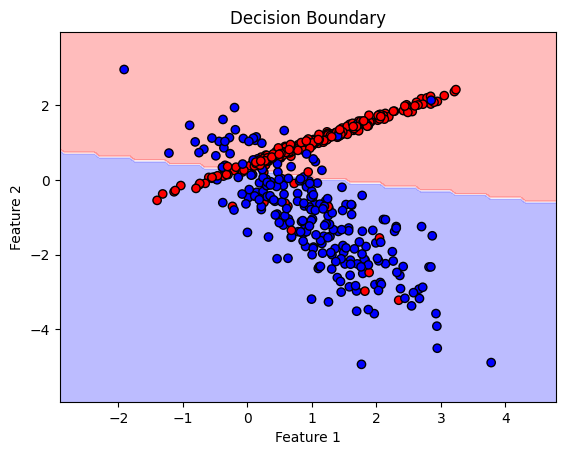

In [5]:
# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)
    
    plt.contourf(xx, yy, probs, alpha=0.3, cmap='bwr')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, log_reg)


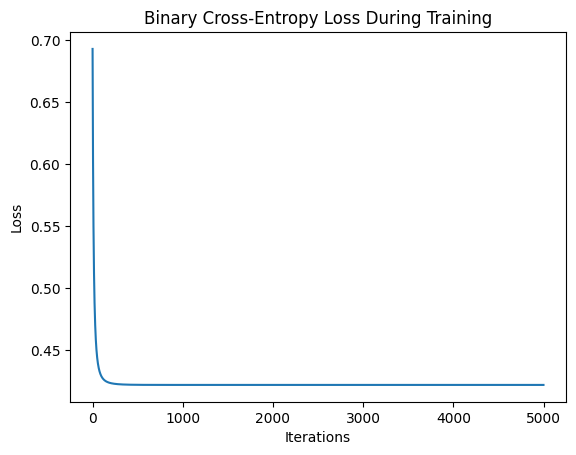

In [6]:
plt.plot(log_reg.loss_history)
plt.title("Binary Cross-Entropy Loss During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


# ✅ Logistic Regression Summary

**What it is:** Binary classification algorithm  
**Why use it:** Probabilistic predictions, simple, interpretable  
**How it works:**
1. Linear combination: z = w·X + b  
2. Sigmoid function: σ(z) → probability  
3. Binary Cross-Entropy Loss  
4. Gradient Descent optimization  
5. Threshold 0.5 → class prediction  

**Key Observations:**
- Model can separate linearly separable data well
- Loss curve shows convergence
- Decision boundary visualizes classification
